<a href="https://colab.research.google.com/github/EddyGiusepe/Machine_Learning/blob/main/3_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Machine Learning: Regressão</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Regressão Linear

A tarefa de `REGRESSÃO` consiste em encontrar uma função que nos permita predezir o valor de uma ou mais variáveis a partir de uma ou mais características (ou features). <font color="orange">Um exemplo seria</font> predezir o preço de uma casa a partir de seu número de habitações, metros quadrados, etc. O modelo mais simples para este tipo de tarefa é o modelo de `Regressão Linear`.


$$
  \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

onde $\hat{y}$ é o valor predito, $w_i$ parâmetros del modelo ou chamados pesos também (aqui também está incluso o `bias` $w_0$), $n$ é o número de características (features) e $x_i$ é a característica $i$. <font color="orange">Este modelo também é conhecido como PERCEPTRON, a base das REDES NEURONAIS</font>. Entrenar um modelo de Regressão Linear consiste em encontrar o conjunto de pesos, $w_i$, que minimizem uma função de CUSTO. Neste caso de regressão linear, o `Erro Quadrático Médio` (MSE) é usado como medida de erro:

$$
  MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2
$$

onde $N$ é o número de amostras em nosso conjunto de Dados, $y^{(i)}$ é o valor real, a etiqueta (ou ground truth) da amostra $j$.   


<font color="yellow">Vejamos um exemplo:</font>

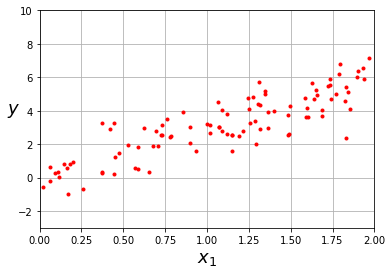

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -3, 10])
plt.grid(True)
plt.show()

Neste caso temos apenas uma característica, $x_1$, a partir da qual queremos predezir somente uma variável $y$ (<font color="orange">por exemplo o preço de uma casa em função de seus metros quadrados</font>). Podemos usar o modelo de `LinearRegression` da biblioteca `scikit-learn`. 

In [2]:
from sklearn.linear_model import LinearRegression

# Nosso modelo
lin_reg = LinearRegression()

# Ajustamos nosso modelo aos Dados
lin_reg.fit(X, y)

# Calculamos os coeficientes (as w_i)
lin_reg.intercept_, lin_reg.coef_ # Bias (interceptar) = w0 , w1=x1; Respectivamente 

(array([0.03658363]), array([[2.86123377]]))

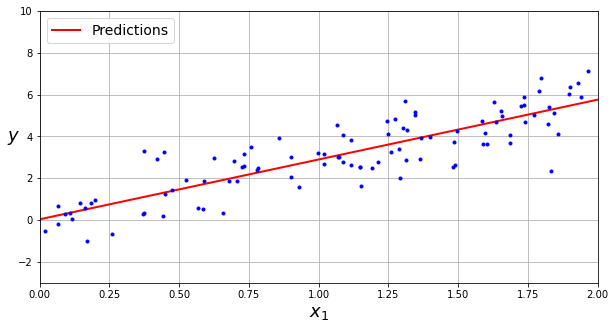

In [3]:
X_new = np.array([[0], [2]]) # Um novo Dado
# Logo fazemo a predição para esse novo Dado
y_predict = lin_reg.predict(X_new)

plt.figure(figsize=(10, 5))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.grid(True)
plt.axis([0, 2, -3, 10])
plt.show()

Como pode ver, este modelo é muito simples, eficiente e explicável. No entanto, se  nossos Dados no seguem uma tendência linear o resultado que obteremos não será bom.

# Regressão Polinomial

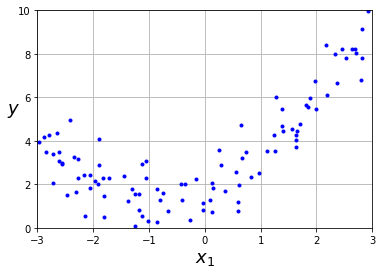

In [4]:
import numpy.random as rnd

np.random.seed(42) # Isto é só para obter os mesmos resultados quando outro cientista reproduzir este script


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

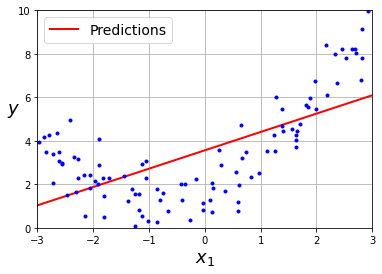

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


X_new = np.array([[-3], [3]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

Como observamos a RETA não se ajusta aos Dados. Então, para este conjunto de Dados podemos utilizar uma FUNÇÃO POLINOMIAL.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Função polinomial de grau 2 (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Aqui representaremos nosso Dado em outro espaço
X_poly = poly_features.fit_transform(X)

# O X[0] é representado por X_poly[0] em outro espaço 
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

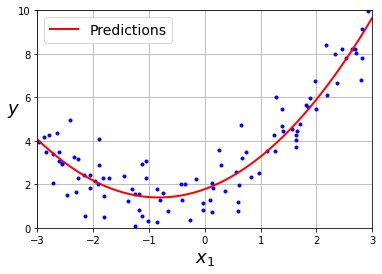

In [8]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

A  nossa dúvida pode ser: Como sei de antemão se meus Dados seguem uma tendência Linear ou não (e mais no caso de trabalhar com múltiplas variáveis)? ... Não temos uma resposta simples, além de provar diferentes graus de polinômios e escolher aquele que dei melhores resultados. Graças a `scikit-learn` podemos fazer isto de maneira simples.

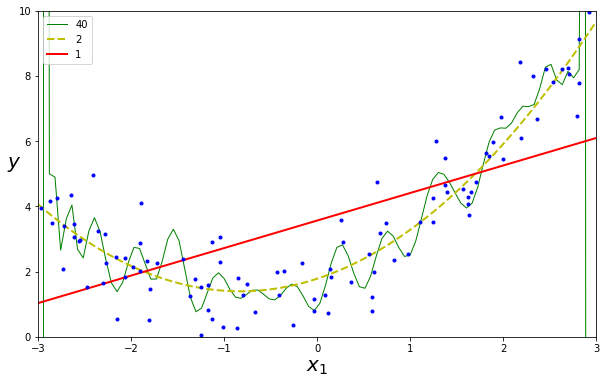

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10, 6))
for style, width, degree in (("g-", 1, 40), ("y--", 2, 2), ("r-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.axis([-3, 3, 0, 10])
plt.show()

Utilizar um grau muito baixo dará como resultado um modelo [Underfitting](https://www.deeplearningbook.com.br/overfitting-e-regularizacao-parte-1/), enquanto que um grau muito alto se traduz em [Overfitting](https://www.deeplearningbook.com.br/overfitting-e-regularizacao-parte-1/). Avaliar os diferentes modelos em um conjunto de validação será necessário para estabelecer o melhor grau possível.

# Descenso de Gradiente

<font color="yellow">Os exemplos apresentados acima têm limitações, porque precisam ter todo o conjunto de Dados em memoria para treinar o modelo. </font> O que ocurre se isto não é possível? ... Uma alternativa é utilizar um algoritmo de treinamento diferente, o qual é conhecido como `DESCENSO POR GRADIENTE` que permite trabalhar com subconjuntos de Dados (ou **mini-batches**).



In [20]:
import math 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
feature_eng = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
])
X_poly = feature_eng.fit_transform(X)

eta = 0.05
n_iterations = 10000
m = len(X_poly)

w1 = np.random.randn(2, 1)
w0 = 0.

batch_size = 50
n_batches = math.ceil(m / batch_size)
print(n_batches)

for iteration in range(n_iterations):
    for batch in range(n_batches):
        _x = X_poly[batch * batch_size: (batch + 1) * batch_size]
        _y = y[batch * batch_size: (batch + 1) * batch_size]
        y_hat = _x.dot(w1) + w0
        loss = np.mean((y_hat - _y)**2)
        grad_w1 = _x * 2.*(y_hat - _y)/m 
        grad_w0 = 2.*(y_hat - _y)/m
        w1 = w1 - eta * grad_w1.mean()
        w0 = w0 - eta * grad_w0.mean()
    if iteration % 1000 == 0:
        print(iteration, loss)

2
0 16.903048923451525
1000 3.1714361290277098
2000 2.8612362712577264
3000 2.847953226720912
4000 2.846510988316806
5000 2.846287711359095
6000 2.8462510278549256
7000 2.846244945230041
8000 2.8462439343080455
9000 2.846243766090422


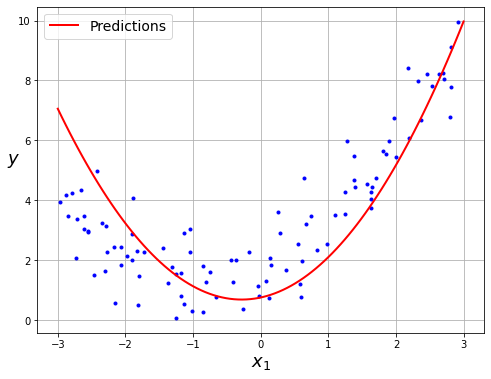

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = feature_eng.transform(X_new)

y_new = X_new_poly.dot(w1) + w0

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()